In [3]:
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns

In [18]:
def roulette(spins, n_bins = 37, n_zeroes = 1, plot = True):
    arr1 = (np.random.rand(spins)*(n_bins-n_zeroes)).astype(int)
    arr2 = (np.random.rand(spins)*n_bins).astype(int)
    
    result = arr1 - arr2
    result[result!=0] = 1
    result[result==0] = -(n_bins-n_zeroes-1)
    s = np.zeros_like(result).astype(float)
        
    if plot:
        #TODO replace this for to something more fast
        tmp = 0
        for i in range(spins):
            tmp += result[i]
            s[i] = tmp/(i+1)
        
        plt.figure(figsize=[15,10])
        plt.subplots_adjust(hspace=0.5)
#         plt.subplot(3, 1, 1)
#         plt.hist(arr1, bins=n_bins-n_zeroes, rwidth=0.8)
#         plt.title('guess')
#         plt.xlabel('result')
#         plt.ylabel("occurences")
        
        plt.subplot(3, 1, 2)
        plt.hist(arr2, bins=n_bins, rwidth=0.8)
        plt.title('roulette')
        plt.xlabel('result')
        plt.ylabel("occurences")
        
        plt.subplot(3, 1, 3)
        plt.plot(s)
        plt.grid(True)
        plt.title('E(gain)')
        plt.xlabel('number of expiremnts')
        plt.ylabel('E(gain)')
        plt.show()
    return result #np.average(result)

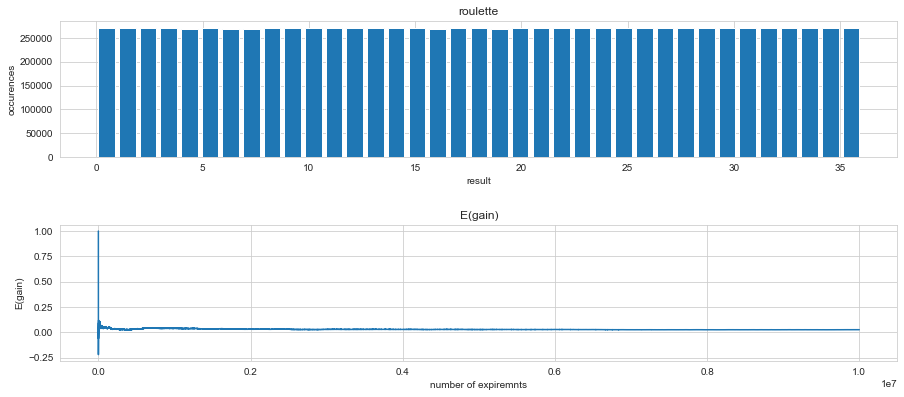

E(gain): 0.0267364


In [21]:
print('E(gain):',np.average( roulette(10_000_000, n_zeroes=1, plot=True)))
#print('E(gain):', roulette(10_000_000, n_zeroes=2, plot=True))

samples set avgerage = 0.02762128
sample average = 0.025804
sample std = 5.841403782789202
sample SE = 0.005841403782789202


[]

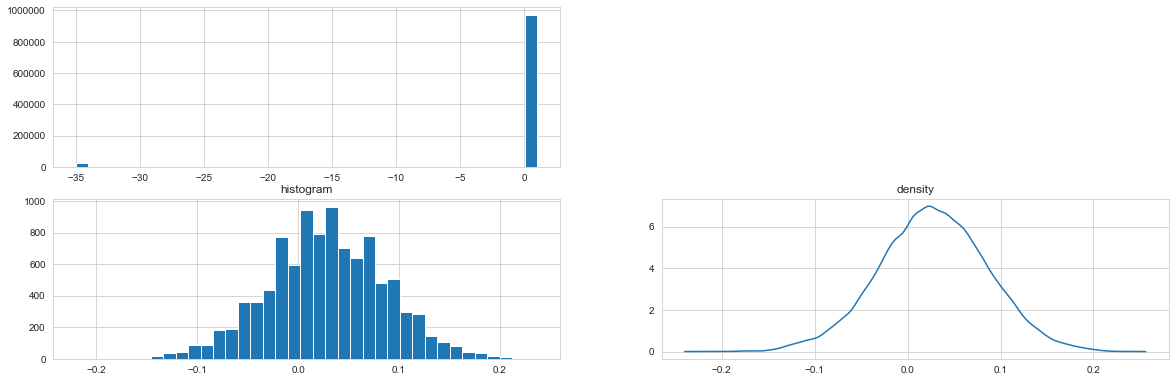

In [61]:
#Central limit theorem demostration
#Crate 10,000 samples of size 10,000 each- measure the mean for each sample
#The samples means are normmaly disrebuted and their mean is close to the mean of the population
sample = roulette(1_000_000,n_zeroes=1, plot=False)

arr = [np.average(roulette(10_000,n_zeroes=1, plot=False)) for i in range(10000)]
print('samples set avgerage =', np.average(arr))
print('sample average =', np.average(sample))
print('sample std =', np.std(sample))
print('sample SE =', np.std(sample)/np.sqrt(sample.shape[0]))

plt.figure(figsize=[20,10])
plt.subplot(3, 2, 1)
plt.hist(sample ,bins = 38 )


plt.subplot(3, 2, 3)
plt.title("histogram")
plt.hist(arr, bins=37)

plt.subplot(3, 2, 4)
plt.title('density')
plt.grid(True)
sns.set_style('whitegrid')
sns.kdeplot(arr, bw=0.0065)
plt.plot()

In [5]:
def bithday_paradox(n_people, x = 2):
    a = (np.random.rand(n_people)*365).astype(int)
    c = Counter(a).most_common()
    if len(c)>0:
        return Counter(a).most_common()[0][1]>=x
    return False

first index above 0.5 22


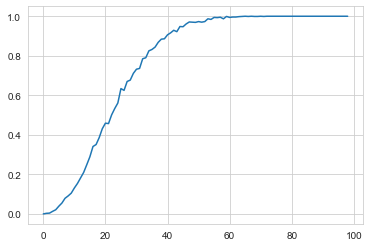

In [6]:
n_experiments = 1000
arr = [np.average([1 if bithday_paradox(i, x=2) else 0 for j in range(n_experiments)]) for i in range(1, 100)]
plt.plot(arr)
indexes = np.where(np.array(arr)>=0.5)[0]
if len(indexes)>0:
    print("first index above 0.5", np.where(np.array(arr)>=0.5)[0][0])
else:
    print("no index found")

first index above 0.5 87


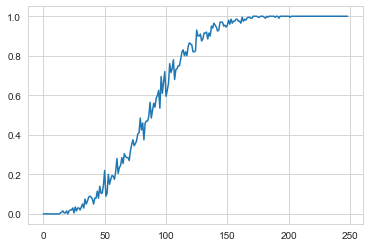

In [7]:
n_experiments = 200
arr = [np.average([1 if bithday_paradox(i, x=3) else 0 for j in range(n_experiments)]) for i in range(1, 250)]
plt.plot(arr)
indexes = np.where(np.array(arr)>=0.5)[0]
if len(indexes)>0:
    print("first index above 0.5", np.where(np.array(arr)>=0.5)[0][0])
else:
    print("no index found")